In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from load_and_clean import *
sys.path.append("../..")
sys.path.append("..")
sys.path.append(os.getcwd())

import numpy as np
import pandas as pd

from tslib.src import tsUtils
from tslib.tests import testdata

#warnings.filterwarnings(action='once')

%matplotlib inline
from filter_data import *
from syn_model import *

import warnings
warnings.filterwarnings("ignore")

from pyod.models.hbos import HBOS
from itertools import product
import datetime

In [6]:
#global settings for graphs        
plt.rc('lines', linewidth=2)
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8.0, 6.0)

plt.rcParams["animation.html"] = "html5"
plt.rcParams['figure.figsize'] = (12, 8)
FONTSIZE = 35

## Load Data

In [7]:

#update_data()

#us = load_clean('NYTimes US')
uscases, usdeaths, usstates = load_clean('NYTimes states')
uscounties_cases, uscounties_deaths, uscounties = load_clean('NYTimes counties')
global_cases, global_deaths = load_clean('JHU global')
us_covid_jhu_cases, us_covid_jhu_deaths = load_clean('JHU US')
# mobility_data_apple = load_clean('mobility Apple')
# mobility_data_google, google_social = load_clean('mobility Google')
# sd_data = load_clean('IHME intervention')
all_population, us_population, usstates_population, uscounties_population = load_clean('population')

uscases_pop_adjusted, usdeaths_pop_adjusted = create_population_adjusted_data(uscases, all_population), \
                                    create_population_adjusted_data(usdeaths, all_population, show_exception = True)
global_cases_pop_adjusted, global_deaths_pop_adjusted = create_population_adjusted_data(global_cases, all_population), \
                                    create_population_adjusted_data(global_deaths, all_population, show_exception = True)

uscounties_cases_pop_adjusted = create_population_adjusted_data(uscounties_cases, all_population, show_exception = True, county = True)
uscounties_deaths_pop_adjusted = create_population_adjusted_data(uscounties_deaths, all_population, county = True)

# state_reopen = load_clean('state reopen')
# #fips_df = pd.read_csv("../COVID/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv")

# ctp_us_data = load_clean('CTP US')
# ctp_state_data = load_clean('CTP states')
# ctp_state_pop_adjusted = {stat: create_population_adjusted_data(data, all_population, show_exception=False) for stat, data in ctp_state_data.items()}

These countries/region do not have population data ['Virgin Islands']
These countries/region do not have population data ['Bahamas', 'Burma', 'Cabo Verde', 'Congo (Brazzaville)', 'Congo (Kinshasa)', "Cote d'Ivoire", 'Diamond Princess', 'Eswatini', 'Gambia', 'Holy See', 'Kyrgyzstan', 'MS Zaandam', 'Micronesia', 'North Macedonia', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Slovakia', 'Summer Olympics 2020', 'Syria', 'Taiwan*', 'West Bank and Gaza']
These countries/region do not have population data ['Adjuntas-Puerto Rico', 'Aguada-Puerto Rico', 'Aguadilla-Puerto Rico', 'Aguas Buenas-Puerto Rico', 'Aibonito-Puerto Rico', 'Anasco-Puerto Rico', 'Anchorage-Alaska', 'Arecibo-Puerto Rico', 'Arroyo-Puerto Rico', 'Barceloneta-Puerto Rico', 'Barranquitas-Puerto Rico', 'Bayamon-Puerto Rico', 'Bristol Bay plus Lake and Peninsula-Alaska', 'Cabo Rojo-Puerto Rico', 'Caguas-Puerto Rico', 'Camuy-Puerto Rico', 'Canovanas-Puerto Rico', 'Carolina-Puerto Rico', 'Catano-Puer

In [8]:
#Filter data (this part might be overlapping some cells, but it should contain most of the varilables that are analyzed. )
# This part might be to split and explain
# This part might be to split and explain
t = 7
#column = list(mobility_data_google.columns).index('retail_and_recreation_percent_change_from_baseline')
global_deaths_filtered = create_filtered_data(global_deaths, 500 )
#the last column of social distancing dataset is the last social distancing measure used by a location
#educational_distancing = get_social_distancing(sd_data, sd_data.columns[-1])

all_data = pd.concat([global_deaths, usdeaths, uscounties_deaths], axis=1).dropna()
all_data_daily = create_rolling_data(all_data, t)

all_data_cases = pd.concat([global_cases, uscases, uscounties_cases], axis=1).dropna()
all_data_cases_daily = create_rolling_data(all_data_cases, t)

all_cases_data_pop = pd.concat([uscases_pop_adjusted,global_cases_pop_adjusted, uscounties_cases_pop_adjusted], axis = 1).dropna()
all_cases_data_pop_daily = create_rolling_data(all_cases_data_pop, t)

all_death_data_pop = pd.concat([usdeaths_pop_adjusted,global_deaths_pop_adjusted, uscounties_deaths_pop_adjusted], axis = 1).dropna()
all_death_data_pop_daily = create_rolling_data(all_death_data_pop, t)

# _, daily_global, intervention_date_global = create_intervention_adjusted_data(global_deaths, educational_distancing, t)
# _, daily_us, intervention_date_us = create_intervention_adjusted_data(usdeaths, educational_distancing, t)
# _, daily_uscounties, intervention_date_uscounties = create_intervention_adjusted_data(uscounties_deaths, educational_distancing, t)

# cases_intervention_adjusted, cases_intervention_adjusted_daily, intervention_date_case = create_intervention_adjusted_data(all_data_cases, educational_distancing, t)
# deaths_intervention_adjusted, deaths_intervention_adjusted_daily, intervention_date_death = create_intervention_adjusted_data(all_data, educational_distancing, t)
#deaths_intervention_adjusted_google, deaths_intervention_adjusted_daily_google, _ = create_intervention_adjusted_data(all_data, google_social, t)

# all_cases_data_pop_adjusted, all_cases_data_pop_adjusted_daily, _ = create_intervention_adjusted_data(all_cases_data_pop, educational_distancing, t)
# all_death_data_pop_adjusted, all_death_data_pop_adjusted_daily, _ = create_intervention_adjusted_data(all_death_data_pop, educational_distancing, t)

# hospitalized_pop_adjusted, hospitalized_pop_adjusted_daily, _ = create_intervention_adjusted_data(ctp_state_pop_adjusted['hospitalizedCurrently'], educational_distancing, t, ignore_nan=True)
# icu_pop_adjusted, icu_pop_adjusted_daily, _ = create_intervention_adjusted_data(ctp_state_pop_adjusted['inIcuCurrently'], educational_distancing, t, ignore_nan=True)
# ventilator_pop_adjusted, icu_pop_adjusted_daily, _ = create_intervention_adjusted_data(ctp_state_pop_adjusted['onVentilatorCurrently'], educational_distancing, t, ignore_nan=True)


# Omicron, delta graph

In [24]:
# source : https://www.nbcchicago.com/news/local/the-omicron-variant-is-confirmed-in-16-us-states-heres-where-and-what-we-know-about-each-case/2700769/
# https://www.beckershospitalreview.com/public-health/states-where-the-omicron-variant-has-been-detected.html
omincron_variant_data_US = {'Alabama': '2021-12-16',
                            'Alaska':'2021-12-13',
                            'Arizona': '2021-12-08',
                            'Arkansas': '2021-12-17',
                            'California': '2021-12-01',
                            'Colorado': '2021-12-02',
                            'Connecticut': '2021-12-04',
                            'Delaware': '2021-12-17',
                            'Florida': '2021-12-07',
                            'Georgia': '2021-12-03',
                            'Hawaii': '2021-12-02',
                            'Idaho': '2021-12-10',
                            'Illinois': '2021-12-07',
                            'Indiana': '2021-12-19',
                            'Iowa': '2021-12-09',
                            'Kansas': '2021-12-16',
                            'Louisiana': '2021-12-03',
                            'Maine': '2021-12-17',
                            'Maryland': '2021-12-03',
                            'Massachusetts': '2021-12-04',
                            'Michigan': '2021-12-09',
                            'Minnesota': '2021-12-02',
                            'Mississippi': '2021-12-06',
                            'Missouri': '2021-12-03',
                            #'Montana': '2021-12-20',
                            'Nebraska': '2021-12-03',
                            'New Hampshire': '2021-12-13',
                            'New Jersey': '2021-12-03', #https://www.inquirer.com/news/omicron-first-new-jersey-case-gov-murphy-20211204.html
                            'New Mexico': '2021-12-13', 
                            'Nevada':'2021-12-13', 
                            'New York': '2021-12-02',
                            'North Carolina': '2021-12-10',
                            'North Dakota': '2021-12-19',
                            'Ohio':  '2021-12-10',
                            #'Oklahoma': '2021-12-21',
                            'Oregon': '2021-12-13',
                            'Pennsylvania': '2021-12-03',
                            'Rhode Island':'2021-12-11',
                            'South Carolina': '2021-12-15',
                            #'South Dakota': '2021-12-22',
                            'Tennessee': '2021-12-11',
                            'Texas': '2021-12-06', # https://www.kxan.com/news/texas/texas-announces-first-detected-case-of-omicron-variant-in-harris-county/
                            'Utah': '2021-12-03',
                            'Vermont':'2021-12-18',
                            'Virginia': '2021-12-09',
                            'Wisconsin': '2021-12-04',
                            'Washington': '2021-12-04',
                            #'Washington, D.C': '2021-12-12',
                            'West Virginia':'2021-12-16',
                            'Wyoming':'2021-12-17',
                     }
omincron_variant_data_US = pd.DataFrame(omincron_variant_data_US, index = ["Date"]).T


## Align the data set by discovery date of delta
df = all_cases_data_pop_daily

target = "Vermont"
target_start = omincron_variant_data_US.loc[target].values[0]
tick_spacing = 15
filter_donor_by_date = True
singVals = 6


## Use the county with delta discovery date earlier than target
if filter_donor_by_date:

    donors = list(omincron_variant_data_US.loc[omincron_variant_data_US['Date'] < target_start].index)
    
else:
    
    donors = list(omincron_variant_data_US.index)
    donors.remove(target)

donor_start = omincron_variant_data_US.loc[donors].values.flatten()

prediction_length = 120

train_length = 50

donor_start_idx = [list(df.index).index(date) - train_length for date in donor_start]
donor_end_idx =  [list(df.index).index(date) + prediction_length for date in donor_start]

target_start_idx = list(df.index).index(target_start) - train_length
target_end_idx = list(df.index).index(target_start) + prediction_length

data_df = df[target][target_start_idx:target_end_idx]
idx = data_df.index
data_df = pd.Series(data_df.values, name = target)
#print(data_df.shape)

for i in range(len(donors)):
    temp_df = df[donors[i]][donor_start_idx[i]:donor_end_idx[i]]
    data_df = pd.concat([data_df, pd.Series(temp_df.values, name = donors[i])], axis = 1)

data_df = data_df[:len(idx)]
data_df.index = idx

# Make "short prediction" after the discovery date
# delta here is the number of days after the discovery date for the target
# predicting the trend for 20 days

## Without HBO

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Iowa', 'Kansas', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Wisconsin', 'Washington', 'West Virginia', 'Wyoming'] 4


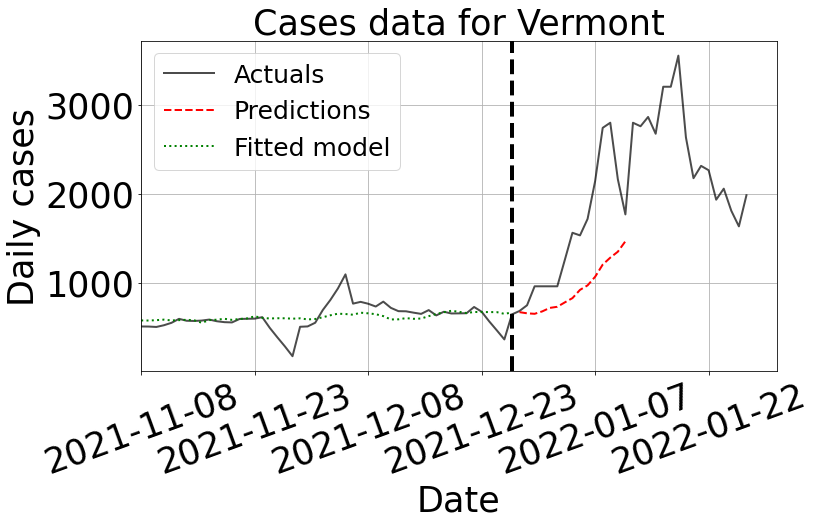

In [25]:
delta = 10
rscModel =syn_model(target, singVals, [data_df.iloc[delta:]], train_length + 15, train_length, otherStates=donors)
rscModel.fit_model(filter_donor = False, filter_method = 'hbo', singVals_estimate = True, singval_mathod ='auto')

predictions = rscModel.predictions
model_fit = rscModel.model_fit

fig, axes = plt.subplots(1, 1, figsize = (12, 8))

rscModel.plot(figure=fig, axes=axes, title_text="Cases data", ylimit=[], xlimit=[], logy=False, show_donors=False, 
              tick_spacing=tick_spacing, xaxis="Date", yaxis="Daily cases", intervention_date_x_ticks=None, fontsize = 35)
#plt.savefig("../Figures/COVID/"+county_state+".png",bbox_inches='tight')    
plt.tight_layout()

print(rscModel.donors, rscModel.kSingularValues)

plt.show()

## With HBO

['Alaska', 'Arizona', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Idaho', 'Illinois', 'Iowa', 'Louisiana', 'Maine', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Wisconsin', 'Washington', 'West Virginia', 'Wyoming'] 7


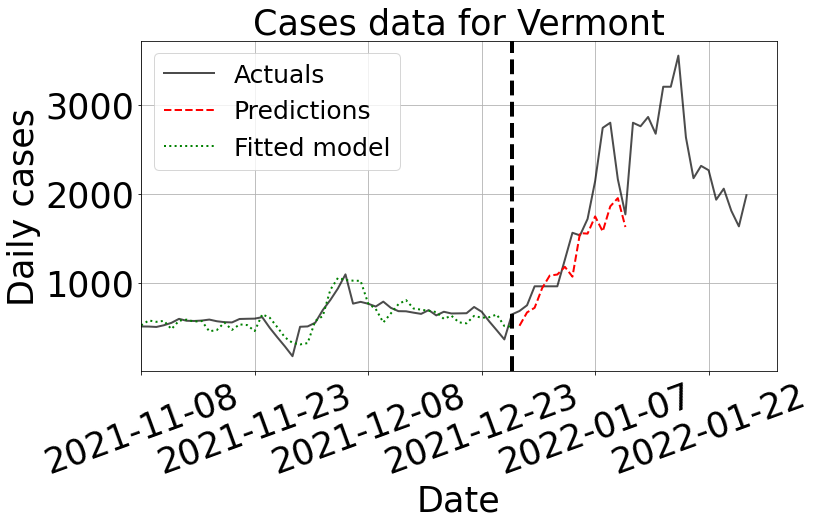

In [26]:
delta = 10
rscModel =syn_model(target, singVals, [data_df.iloc[delta:]], train_length + 15, train_length, otherStates=donors)
rscModel.fit_model(filter_donor = True, filter_method = 'hbo', singVals_estimate = True, singval_mathod ='auto')

predictions = rscModel.predictions
model_fit = rscModel.model_fit

fig, axes = plt.subplots(1, 1, figsize = (12, 8))

rscModel.plot(figure=fig, axes=axes, title_text="Cases data", ylimit=[], xlimit=[], logy=False, show_donors=False, 
              tick_spacing=tick_spacing, xaxis="Date", yaxis="Daily cases", intervention_date_x_ticks=None, fontsize = 35)
#plt.savefig("../Figures/COVID/"+county_state+".png",bbox_inches='tight')    
plt.tight_layout()

print(rscModel.donors, rscModel.kSingularValues)

plt.show()

## Mark Analysis

In [9]:
gov_data = pd.read_excel("COVID_scores.xlsx")
gov_data['DATE'] = pd.to_datetime(gov_data['DATE'])
gov_data = gov_data[['STATE', "DATE", "CATEGORY5"]]
gov_data = gov_data.dropna()
gov_data["CATEGORY5"] = gov_data.dropna().groupby(by = ["STATE"]).cumsum()["CATEGORY5"]
min_date = np.min(gov_data.DATE)
max_date = np.max(gov_data.DATE)

date_df = pd.DataFrame(pd.date_range(start = min_date, end= max_date), columns = ["DATE"]).values.flatten()
state_df = pd.DataFrame(pd.unique(gov_data.STATE), columns = ["STATE"]).values.flatten()
temp_df = pd.DataFrame(list(product(state_df, date_df)), columns=['STATE', 'DATE'])

df = pd.merge(temp_df, gov_data, how = "outer")
mask_df = pd.pivot_table(df, values="CATEGORY5", index="DATE", columns="STATE", dropna = False)
mask_df.iloc[0] = 0
mask_df = mask_df.fillna(method="ffill")
mask_df.columns = mask_df.columns.map(lambda x: " ".join([w.capitalize() for w in x.split()]))
mask_df.rename(columns = {'District Of Columbia':'District of Columbia'}, inplace = True)

start_date= "2021-02-23"
singVals = 3
data_df = all_cases_data_pop_daily.loc[start_date:]
data_df = data_df.iloc[:300]

date_range = 80
tick_spacing = 50 

mask_mandate = list(mask_df.columns[np.all(mask_df.loc[start_date:].iloc[:date_range] > 0.5, axis = 0)])
non_mask_mandate = list(mask_df.columns[np.all(mask_df.loc[start_date:].iloc[:date_range] < 0.5, axis = 0)])
policy_change = list(set(mask_df.columns) - set(mask_mandate) - set(non_mask_mandate))

### County Level

In [10]:


donors = []
for counties in uscounties_cases.columns:
    names = counties.split('-')
    if names[-1] in mask_mandate and names[0] != 'Unknown':
        donors.append(counties)
        
target_state = "Oregon" #policy_change[3]
print("Use the counties in state " + target_state)

targets = []
for counties in uscounties_cases.columns:
    names = counties.split('-')
    if names[-1] == target_state and names[0] != 'Unknown':
        targets.append(counties)
        
        
#targets = ['Los Angeles-California', 'Broward-Florida' ,'DeKalb-Georgia','Bartholomew-Indiana','Jefferson-Louisiana']#, 'Fulton-Georgia','Gwinnett-Georgia', 'Tarrant-Texas', 'Bexar-Texas','Collin-Texas','Mohave-Arizona','Yuma-Arizona','Maricopa-Arizona', 'Ascension-Louisiana',  'East Carroll-Louisiana']#counties_recommended# ['Ascension-Louisiana', 'Jefferson-Louisiana', 'Bartholomew-Indiana', 'Riverside-California', 'Broward-Florida' ]# #counties_recommended #masks_mandated


Use the counties in state Oregon


Counterfactual analysis of Mask recommended counties based on a donor pool of Mask mandated counties
18
Baker-Oregon 967.3958621345009


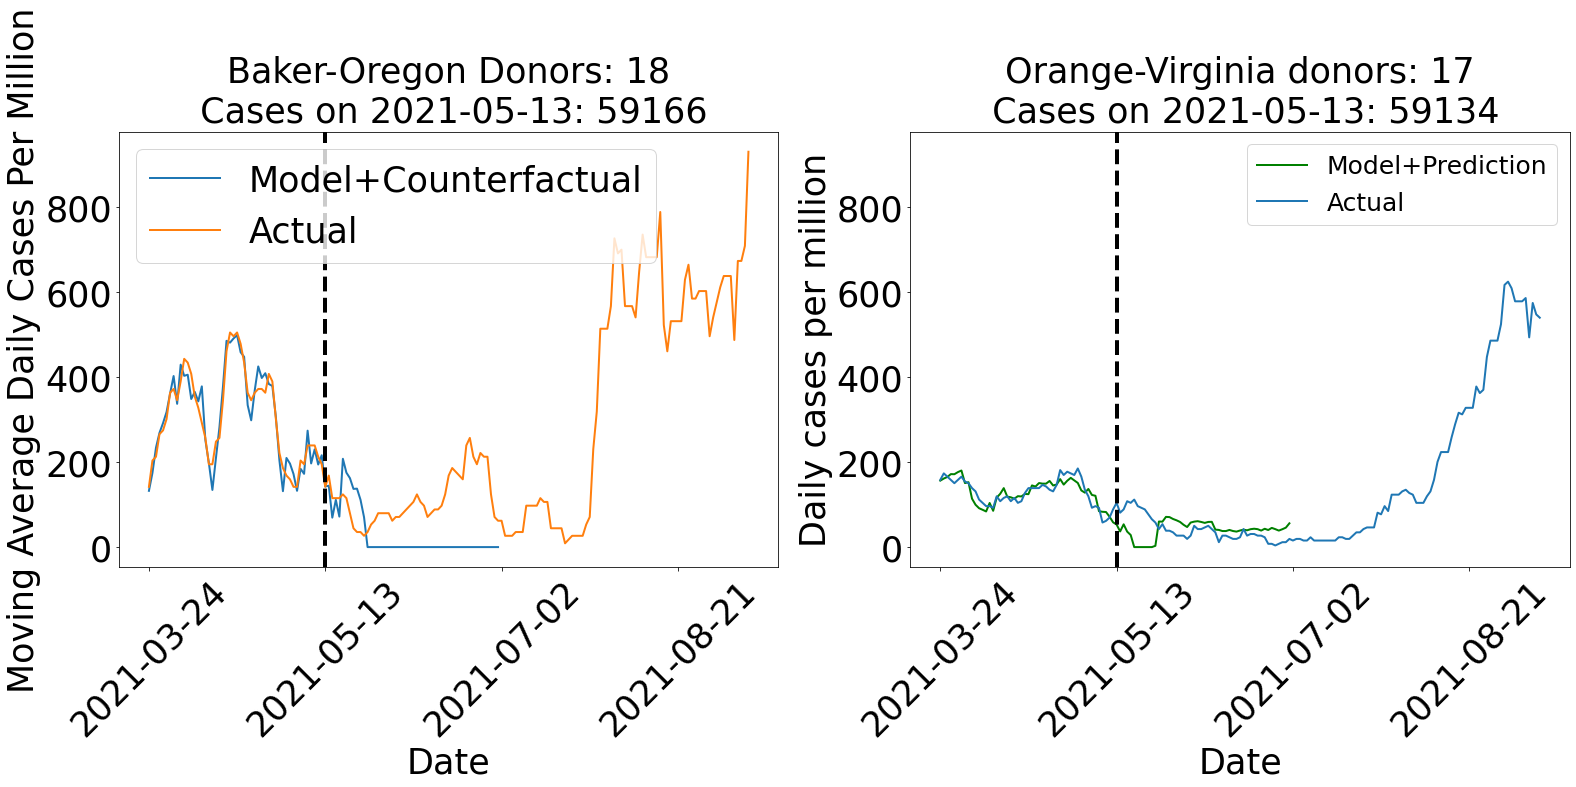

2
2
5
Clackamas-Oregon 1775.948564695369


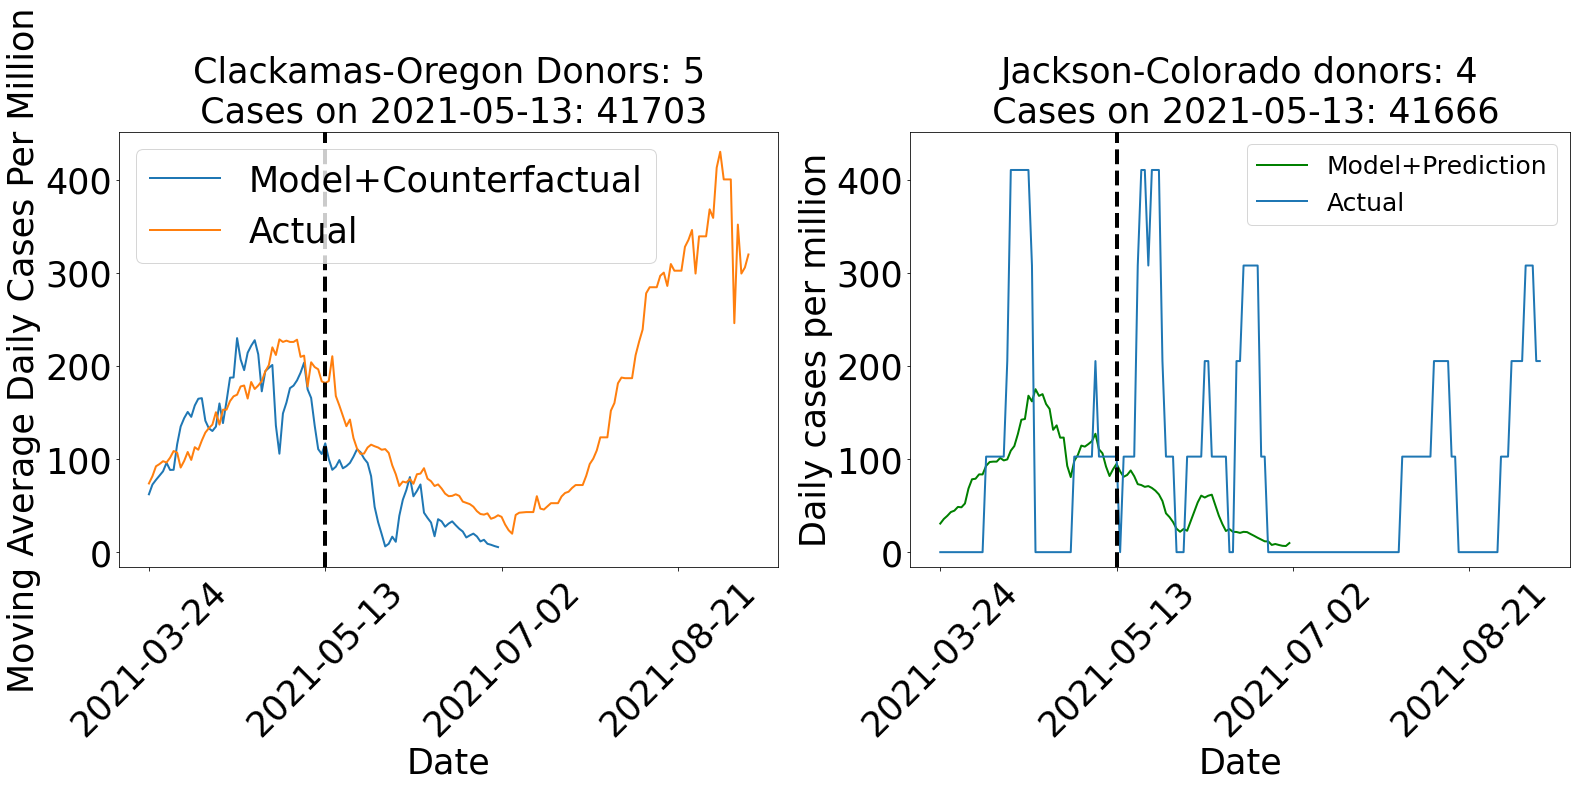

1
1
2
2


In [11]:

#df = df[df.columns[(df>100).any()]].copy()

data_df = all_cases_data_pop_daily.loc[start_date:].iloc[:200]
df_pop = all_cases_data_pop.loc[start_date:].iloc[:200]
prediction_range = 50

plt.rcParams.update({'font.size': 30})


temp = mask_df[target_state].loc[start_date:].iloc[:date_range]
intervention_date = np.arange(1, len(temp))[np.diff(temp) < 0][0]
if intervention_date < 30:
    print("Not Enough training date")
    pass

low_thresh = np.minimum(intervention_date, 50)
cur_data_df = data_df.iloc[np.maximum(0, intervention_date - 50):]
cur_pop_df = df_pop.iloc[np.maximum(0, intervention_date - 50):]


# targets = ['Jefferson-Louisiana', 'Bartholomew-Indiana' , \
#            'Broward-Florida', 'Riverside-California', 'Crisp-Georgia', \
#            'Bullock-Alabama']#counties_recommended #counties_recommended

#targets = list(df_pop.loc[low_thresh_date, targets].sort_values().keys())

singVals=6

num_rows_to_plot = int(len(targets))+1
#plt.rcParams['figure.figsize'] = (24, num_rows_to_plot*5.0)
plt.rcParams['figure.figsize'] = (26, 8.0)

mask_mandate_model = []
target_model = []

i=1
print("Counterfactual analysis of Mask recommended counties based on a donor pool of Mask mandated counties")

sum_actual_target = np.zeros(prediction_range)
sum_pred_target = np.zeros(prediction_range)

sum_actual_donors = np.zeros(prediction_range)
sum_pred_donors = np.zeros(prediction_range)

for state in targets[:5]:
    #otherStates = donors.copy()
    otherStates = cur_pop_df.columns[(cur_pop_df.iloc[low_thresh] < 
                                  cur_pop_df[state].iloc[low_thresh]+0.02*cur_pop_df[state].iloc[low_thresh])
                                &(cur_pop_df.iloc[low_thresh] > cur_pop_df[state].iloc[low_thresh]-0.02*cur_pop_df[state].iloc[low_thresh])]
    
    otherStates = list(otherStates[otherStates.isin(donors)])
    print(len(otherStates))
    

    if state in otherStates:
        otherStates.remove(state)
    if (len(otherStates)<5):
        print(len(otherStates))
        continue
        
    try:

        rscModel = syn_model(state, singVals, [cur_data_df], low_thresh + prediction_range, low_thresh, otherStates=otherStates)
        rscModel.fit_model(filter_donor = True, filter_method = 'hbo', singVals_estimate = True, singval_mathod ='auto')
        target_model.append(rscModel)
    except:
        continue
        
    predictions = rscModel.predictions
    model_fit = rscModel.model_fit
    
    sum_actual_target += rscModel.actual[rscModel.low_thresh:rscModel.thresh].values 
    sum_pred_target += predictions

    #print(state, fit_error, prediction_error)
    if(len(otherStates)<5):
        print(otherStates)
        continue
    if(rscModel.train_err > 60):
        print(state, rscModel.train_err)
    else:
        print(state)

    #ax = plt.subplot(num_rows_to_plot,2,2*i-1)
    ax = plt.subplot(1,2,1)
    #fig, ax = plt.subplots(1,1)
        
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.set_title(state+" Donors: "+str(len(otherStates))
                 + "\n Cases on "+ cur_pop_df.index[low_thresh]+ ": " + str(int(cur_pop_df[state].iloc[low_thresh])) ,fontsize=FONTSIZE, pad=10)
    plt.plot(np.concatenate((model_fit, predictions)), label='Model+Counterfactual'), plt.plot(cur_data_df[state], label='Actual'), 
    plt.ylabel('Moving Average Daily Cases Per Million',fontsize=FONTSIZE),
    plt.axvline(x=cur_data_df.index[low_thresh], color='k', linestyle='--', linewidth=4), plt.legend(fontsize=FONTSIZE)
    plt.xlabel('Date',fontsize = FONTSIZE )
    plt.xticks(rotation=45, fontsize = FONTSIZE), plt.yticks(fontsize = FONTSIZE) 
    y_min, y_max = ax.get_ylim()
    
    new_state = otherStates[np.argmin(np.abs(cur_pop_df[otherStates].iloc[low_thresh]-cur_pop_df[state].iloc[low_thresh]))]
    #otherStates = df.columns[(df.iloc[low_thresh] < df[new_state].iloc[low_thresh]+
    #                          .5*df[new_state].iloc[low_thresh])&(df.iloc[low_thresh] > df[new_state].iloc[low_thresh]-0.5*df[new_state].iloc[low_thresh])]
    #otherStates = list(otherStates[otherStates.isin(donors)])
    #print(state, "\n", len(otherStates))
    
    if new_state in otherStates:
        otherStates.remove(new_state)
    
    try:

    
        rscModel2 = syn_model(new_state, singVals, [cur_data_df], low_thresh + prediction_range, low_thresh, otherStates=otherStates)

        rscModel2.fit_model(filter_donor = True, filter_method = 'hbo', singVals_estimate = True, singval_mathod ='auto')



        mask_mandate_model.append(rscModel2)
    except:
        continue
    
    predictions = rscModel2.predictions
    model_fit = rscModel2.model_fit
    
    sum_actual_donors += rscModel2.actual[rscModel2.low_thresh:rscModel2.thresh].values 
    sum_pred_donors += predictions
    
    #ax = plt.subplot(num_rows_to_plot,2,2*i)
    ax = plt.subplot(1,2,2)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.set_title(new_state+" donors: "+str(len(otherStates))
                 + "\n Cases on "+ cur_pop_df.index[low_thresh]+ ": " + str(int(cur_pop_df[new_state].iloc[low_thresh])) ,fontsize=FONTSIZE, pad=10)

    plt.plot(np.concatenate((model_fit, predictions)), color='green', label='Model+Prediction'),
    plt.plot(cur_data_df[new_state], label='Actual'), plt.legend(fontsize = FONTSIZE), 
    plt.ylabel('Daily cases per million',fontsize = FONTSIZE),
    plt.ylim([y_min, y_max])
    plt.axvline(x=cur_data_df.index[low_thresh], color='k', linestyle='--', linewidth=4), plt.legend(fontsize = 25)
    #plt.savefig("../figures/"+state+".png")
    
    plt.xlabel('Date',fontsize = FONTSIZE )
    plt.xticks(rotation=45, fontsize = FONTSIZE), plt.yticks(fontsize = FONTSIZE) 
    
    i=i+1
    #plt.savefig('../Figures/COVID/'+state+'_'+new_state+'.pdf', bbox_inches='tight')

    plt.show()
    

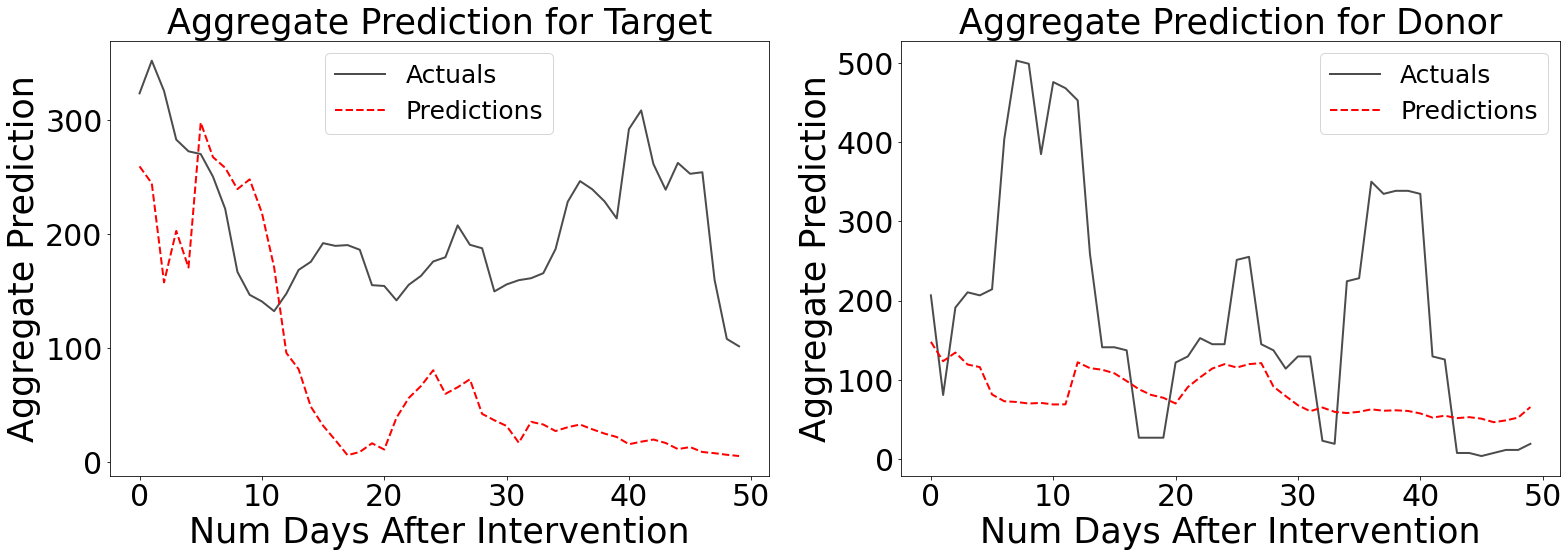

In [29]:
## Aggregate graph for targets

plt.subplot(1,2,1)
plt.plot(sum_actual_target, label='Actuals', color='k', linestyle='-', alpha = 0.7)
plt.plot(sum_pred_target, label='Predictions', color='r', linestyle='--')
plt.legend(fontsize = 25)
plt.title("Aggregate Prediction for Target", fontsize = FONTSIZE)
plt.xlabel("Num Days After Intervention", fontsize = FONTSIZE)
plt.ylabel("Aggregate Prediction", fontsize = FONTSIZE)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)

plt.subplot(1,2,2)
plt.plot(sum_actual_donors, label='Actuals', color='k', linestyle='-', alpha = 0.7)
plt.plot(sum_pred_donors, label='Predictions', color='r', linestyle='--')
plt.legend(fontsize = 25)
plt.title("Aggregate Prediction for Donor", fontsize = FONTSIZE)
plt.xlabel("Num Days After Intervention", fontsize = FONTSIZE)
plt.ylabel("Aggregate Prediction", fontsize = FONTSIZE)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
plt.show()